In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
# The next line makes sure the random numbers are the same
# for each run of the tutorial.
np.random.seed(42)

Let's say we have a population of a million frogs, with weights around 10g.

We could imagine that, if we could measure the weights of all million frogs, they might look like this:

In [5]:
population = np.random.normal(10, 2, size=1000000)

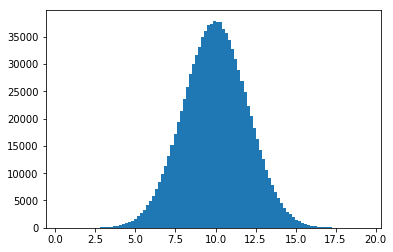

In [6]:
plt.hist(population, bins=100);

The population mean (the mean of all possible values):

In [7]:
population_mean = np.mean(population)
population_mean

9.9968004870914875

Population standard deviation (the standard deviation of all possible values from the population mean):

In [8]:
population_std = np.std(population)
population_std

2.0003760736094618

Now we take a random sample of 500 values from this population:

In [9]:
# Take a random sample size 500 from the population
sample = np.random.choice(population, size=500, replace=False)

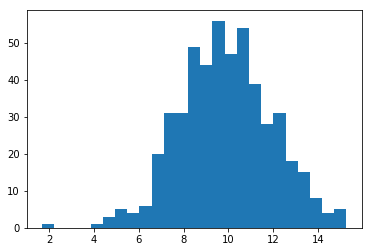

In [21]:
plt.hist(sample, bins=25);

The *sample mean* is the mean of values *in the sample*:

In [11]:
np.mean(sample)

9.8793860309048789

Notice that the sample mean is not exactly the same as the population mean.  When we take our sample, by chance we may have picked up more light frogs than average, or more heavy frogs.

The *sample standard deviation* is the standard deviation of the sample values from the sample mean:

In [12]:
np.std(sample)

2.0776827429645155

If we take another sample, it won't have the same mean as the population, for the reasons above.  But - it won't have the same mean as the first sample, for the same reason:

In [13]:
sample_2 = np.random.choice(population, size=500, replace=False)

In [14]:
np.mean(sample_2)

10.071333440721352

If we draw one frog at random from the pond, then the weight of that frog will be somewhat random, with weights around 10 being more common (the population mean), and weights around 8 or 12 being less common.

If we draw one sample of 500 frogs at random, the mean will also be somewhat random, with a mean weight of around 10 being more common (the population mean), and mean weights of around 9.8 or 10.2 being less common.  For example, here I am drawing 1000 samples from the population.  For each sample, I calculate the mean and store it.  After I have done that, I have 1000 sample means.

In [15]:
# We will collect the sample means in a list
sample_means = []
# Repeat the following statements 1000 times:
for i in range(1000):
    # Take a new random sample
    new_sample = np.random.choice(population, size=500, replace=False)
    # Record the mean of the sample in the list.
    sample_means.append(np.mean(new_sample))

Remember the mean of the sample will vary a little bit either side of 10 (the population mean).   So our 1000 means from our 1000 samples will form a *distribution*.  This is the *sampling distribution* of the mean - that is, the distribution of the mean when we take random samples of 500 from this population.

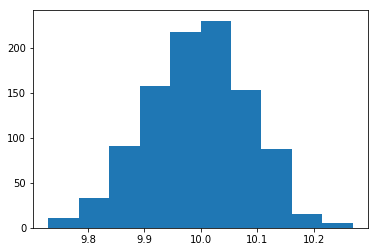

In [16]:
plt.hist(sample_means);

The mean of these means (the mean of the sampling distribution) will be very near the population mean:

In [17]:
np.mean(sample_means)

9.9942888499851623

The sampling distribution has a spread either side of the mean, given by its standard deviation:

In [18]:
np.std(sample_means)

0.089712451627323664

The standard deviation of the sample means, is the *standard error of the mean*.

Of course, we can't generally take thousands of samples, and measure their means, to get the sampling distribution of the mean, as we have here.  If we could, we could just measure its standard deviation, as we did above. But it turns out that we can use some simple mathematics to estimate the standard deviation of the sampling distribution, using the standard deviation of a single sample.  The formula turns out to be:

$$
SEM = s / \sqrt{n}
$$

where $s$ is the standard deviation of the sample, and $n$ is the number of observations in the sample.  We found out above, that the standard deviation of the sampling distribution was:

In [19]:
np.std(sample_means)

0.089712451627323664

Our estimate from the SEM calculation above is:

In [20]:
SEM = np.std(sample) / np.sqrt(500)
SEM

0.092916796978937594

So, the SEM estimate is pretty close to the standard deviation we see when taking lots of samples.